In [1]:
def file_num(name):
    return int(name.split('_')[1].split('.')[0])


In [2]:
import os
import glob
import csv
import numpy as np

hist = [[] for i in range(41)]
for i in range(1, 33):
    dir_name = 'generated_bis/{}/protocols'.format(i)
    files = [name for name in os.listdir(dir_name) if os.path.isfile(os.path.join(dir_name, name))]
    print('dir', i, ':', len(files), 'files')
    for fname in files:
        rows = []
        full_fname = os.path.join(dir_name, fname)
        fnum = file_num(fname)
        with open(full_fname, newline='') as csvfile:
            reader = csv.reader(csvfile, delimiter=',')
            for row in reader:
                rows.append(list(map(float, row)))
            try:
                with open('generated_bis/{}/aliveCount/{}_{}.csv'.format(i, i, fnum), newline='') as countfile:
                    c = int(countfile.read())
                    hist[int(sum(rows[1])/0.25)].append(c)
            except:
                pass
            

dir 1 : 5392 files
dir 2 : 5316 files
dir 3 : 5237 files
dir 4 : 5238 files
dir 5 : 5148 files
dir 6 : 5133 files
dir 7 : 5155 files
dir 8 : 5089 files
dir 9 : 5074 files
dir 10 : 5068 files
dir 11 : 5070 files
dir 12 : 5084 files
dir 13 : 5111 files
dir 14 : 5077 files
dir 15 : 5054 files
dir 16 : 5045 files
dir 17 : 5035 files
dir 18 : 5055 files
dir 19 : 5033 files
dir 20 : 5024 files
dir 21 : 4997 files
dir 22 : 4943 files
dir 23 : 4990 files
dir 24 : 4981 files
dir 25 : 5019 files
dir 26 : 4980 files
dir 27 : 4991 files
dir 28 : 4934 files
dir 29 : 4943 files
dir 30 : 4946 files
dir 31 : 4958 files
dir 32 : 4176 files


## Protokołów o mniejszej sumie dawek jest mniej. 

In [3]:
for s in range(12, 41):
    print('sum: {} | count: {}'.format(s/4, len(hist[s])))    

sum: 3.0 | count: 355
sum: 3.25 | count: 570
sum: 3.5 | count: 890
sum: 3.75 | count: 1375
sum: 4.0 | count: 1957
sum: 4.25 | count: 2680
sum: 4.5 | count: 3452
sum: 4.75 | count: 4110
sum: 5.0 | count: 4716
sum: 5.25 | count: 5578
sum: 5.5 | count: 5927
sum: 5.75 | count: 6472
sum: 6.0 | count: 6756
sum: 6.25 | count: 7021
sum: 6.5 | count: 7144
sum: 6.75 | count: 7396
sum: 7.0 | count: 7479
sum: 7.25 | count: 7400
sum: 7.5 | count: 7397
sum: 7.75 | count: 7431
sum: 8.0 | count: 7486
sum: 8.25 | count: 7122
sum: 8.5 | count: 7115
sum: 8.75 | count: 7411
sum: 9.0 | count: 7354
sum: 9.25 | count: 7241
sum: 9.5 | count: 7012
sum: 9.75 | count: 6894
sum: 10.0 | count: 6987


### <del>Średnia liczba komórek rośnie wraz ze wzrostem dawki, ale różnica pomiędzy średnimi dla dawki 3 i 10 jest mniejsza niż jedno odchylenie standardowe.

<del>Malejące odchylenie może wynikać z większej liczby próbek dla większych dawek.
    
Powyższe nieaktualne dla nowych danych, wygenerowanych po naprawieniu błędu z commita 7f59b52. Im wyższa dawka, tym mniejsza średnia liczba komórek.

[Text(0, 0.5, 'std dev'), Text(0.5, 0, 'dose')]

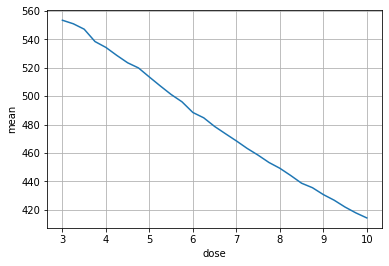

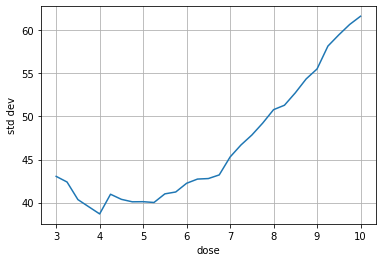

In [5]:
import matplotlib
import matplotlib.pyplot as plt

s = np.arange(3, 10.25, 0.25)
av = list(map(np.mean, hist[12:]))
fig, ax_mean = plt.subplots()
ax_mean.plot(s, av)

ax_mean.set(xlabel='dose', ylabel='mean')
ax_mean.grid()

stddev = list(map(np.std, hist[12:]))
fig_s, ax_std = plt.subplots()
ax_std.grid()
ax_std.plot(s, stddev)
ax_std.set(xlabel='dose', ylabel='std dev')


### Rozkłady liczby żywych kokmórek są bardzo podobne, niezależnie od dawki.

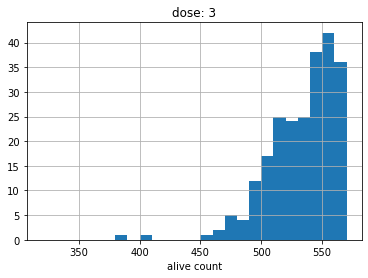

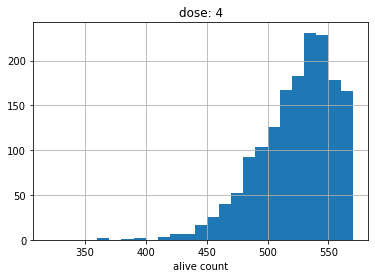

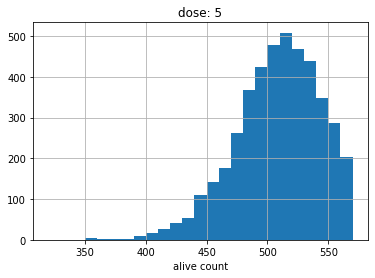

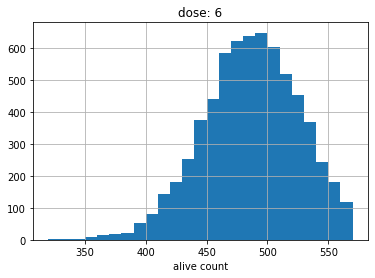

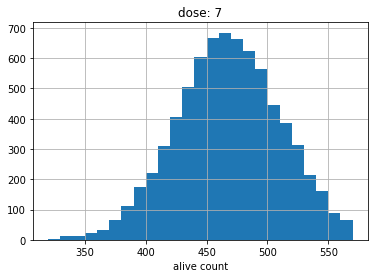

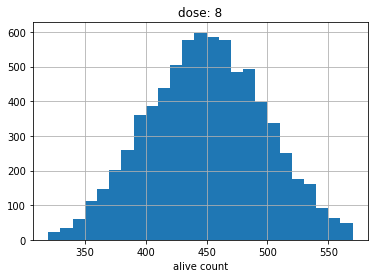

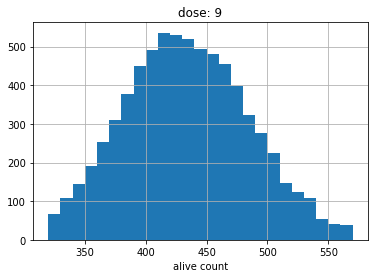

In [6]:
bins = np.arange(320, 580, 10)
for s in range(3, 10):
    fig2, h = plt.subplots()
    h.hist(hist[s * 4], bins=bins)
    h.set_title('dose: {}'.format(s))
    h.grid()
    h.set(xlabel='alive count')